In [4]:
pip install pandas openpyxl

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.5 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.5 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.5 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.5 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.5 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.5 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.5 MB 1.6 MB/s eta 0:00:06
   ----------- ---------------------------- 3.4/11.5 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.7/11.5 MB 1.6 MB/s eta 0:00:05
   ------------- -------------------------- 3.9/11.5 MB 1.7 MB/s eta 0:00:05
   --------------- ------------------------ 4.5/11.5 MB 1.7 MB/s eta 0:00:05
   ---

In [8]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 1.8 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.8 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.1 MB 1.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 4.5/8.1 MB 2.0 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.1 MB 2.0 MB/s eta 0:00:02
   -----------------------

In [11]:
!pip install seaborn

In [12]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the Excel file
df = pd.read_excel(r"D:\DEPI Google Data Analysis ONLINE\Final Project\output5.xlsx")

In [15]:
# Display the first few rows
print(df.head())

              OrderID  PackID  PackQuantity  PackPrice  \
0  ROID-SR-006-000002      41           1.0       45.0   
1  ROID-SR-006-000002      43           1.0       45.0   
2  ROID-SR-006-000002      35           1.0       45.0   
3   ROID-8-E81-000001    2165           2.0        0.0   
4   ROID-8-E43-000001     614           2.0        0.0   

   ItemQuantityForOnePack                       ProductName  CustomerID  \
0                     1.0    بسكويت العبد برتقال 18 قطعة*12    50008547   
1                     1.0   بسكويت العبد جوز هند 18 قطعة*12    50008547   
2                     1.0  بسكويت العبد بالزبدة 18 قطعة *12    50008547   
3                     1.0                              item    50008996   
4                    12.0      عصير لمار 1لتر بيور مانجو*12    50016140   

  CustomerCode  
0    100000646  
1    100000646  
2    100000646  
3    100001095  
4    100008230  


In [20]:
# Replace 'صنف' and 'item' with NA in ProductName
df['ProductName'] = df['ProductName'].replace(['صنف', 'item'], pd.NA)

In [21]:
# Drop rows with missing critical information
df = df.dropna(subset=['OrderID', 'PackID', 'ProductName'])

In [22]:
# Remove duplicate rows
df = df.drop_duplicates()

In [23]:
# Convert "0E-9" to 0 in PackPrice
df['PackPrice'] = df['PackPrice'].replace('0E-9', 0).astype(float)

In [24]:
# Convert data types
df["PackQuantity"] = df["PackQuantity"].astype(int)
df["PackPrice"] = df["PackPrice"].astype(float)
df["ItemQuantityForOnePack"] = df["ItemQuantityForOnePack"].astype(int)
df["CustomerID"] = df["CustomerID"].astype(str)
df["CustomerCode"] = df["CustomerCode"].astype(str)

In [25]:
# Strip extra spaces from column names and string values
df.columns = df.columns.str.strip()
df["ProductName"] = df["ProductName"].str.strip()
df["CustomerCode"] = df["CustomerCode"].str.strip()

In [26]:
# Reset index after cleaning
df = df.reset_index(drop=True)

In [27]:
 # Set a font that supports Arabic
plt.rcParams['font.family'] = 'Tahoma'  # or 'Arial', 'Amiri' if installed

In [28]:
# Display the cleaned dataframe
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
                   OrderID  PackID  PackQuantity  PackPrice  \
0       ROID-SR-006-000002      41             1       45.0   
1       ROID-SR-006-000002      43             1       45.0   
2       ROID-SR-006-000002      35             1       45.0   
3        ROID-8-E43-000001     614             2        0.0   
4  OID-VS_SYS_ADMIN-000019      17             1      105.0   

   ItemQuantityForOnePack                       ProductName CustomerID  \
0                       1    بسكويت العبد برتقال 18 قطعة*12   50008547   
1                       1   بسكويت العبد جوز هند 18 قطعة*12   50008547   
2                       1  بسكويت العبد بالزبدة 18 قطعة *12   50008547   
3                      12      عصير لمار 1لتر بيور مانجو*12   50016140   
4                       1                 خل رانسي 900مل*12   50015299   

  CustomerCode  
0    100000646  
1    100000646  
2    100000646  
3    100008230  
4    100007398  


In [29]:
# Calculate total value per product
df['TotalValue'] = df['PackQuantity'] * df['PackPrice']

In [30]:
# Group by product and sum total value
top_sales = df.groupby('ProductName')['TotalValue'].sum().nlargest(10)

C:\Users\Mayoui\AppData\Local\Temp\ipykernel_8452\641374208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sales.values, y=top_sales.index, palette="mako")


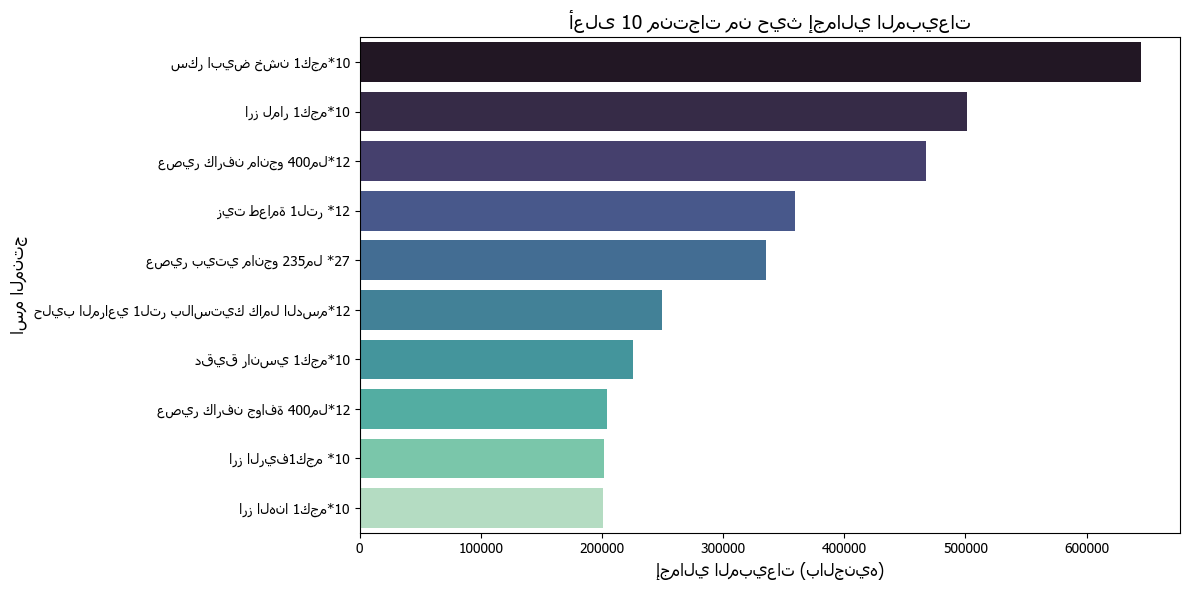

In [31]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales.values, y=top_sales.index, palette="mako")
plt.title('أعلى 10 منتجات من حيث إجمالي المبيعات', fontsize=14)
plt.xlabel('إجمالي المبيعات (بالجنيه)', fontsize=12)
plt.ylabel('اسم المنتج', fontsize=12)
plt.tight_layout()
plt.show()

In [35]:
pip install arabic_reshaper

Note: you may need to restart the kernel to use updated packages.


In [38]:
!pip install python-bidi

In [43]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

text = "مجك1 انهلا زرا"
corrected = get_display(reshape(text))  # Output: "ارز الهنا 1 كجم"

C:\Users\Mayoui\AppData\Local\Temp\ipykernel_8452\641374208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sales.values, y=top_sales.index, palette="mako")


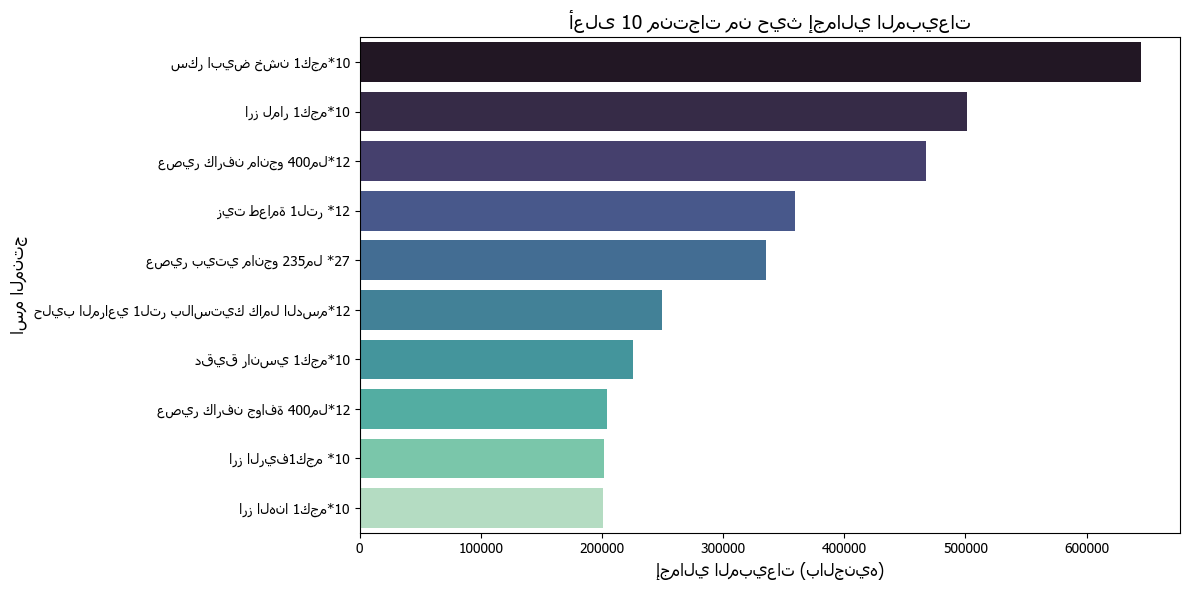

In [44]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales.values, y=top_sales.index, palette="mako")
plt.title('أعلى 10 منتجات من حيث إجمالي المبيعات', fontsize=14)
plt.xlabel('إجمالي المبيعات (بالجنيه)', fontsize=12)
plt.ylabel('اسم المنتج', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Mayoui\AppData\Local\Temp\ipykernel_8452\3701716279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


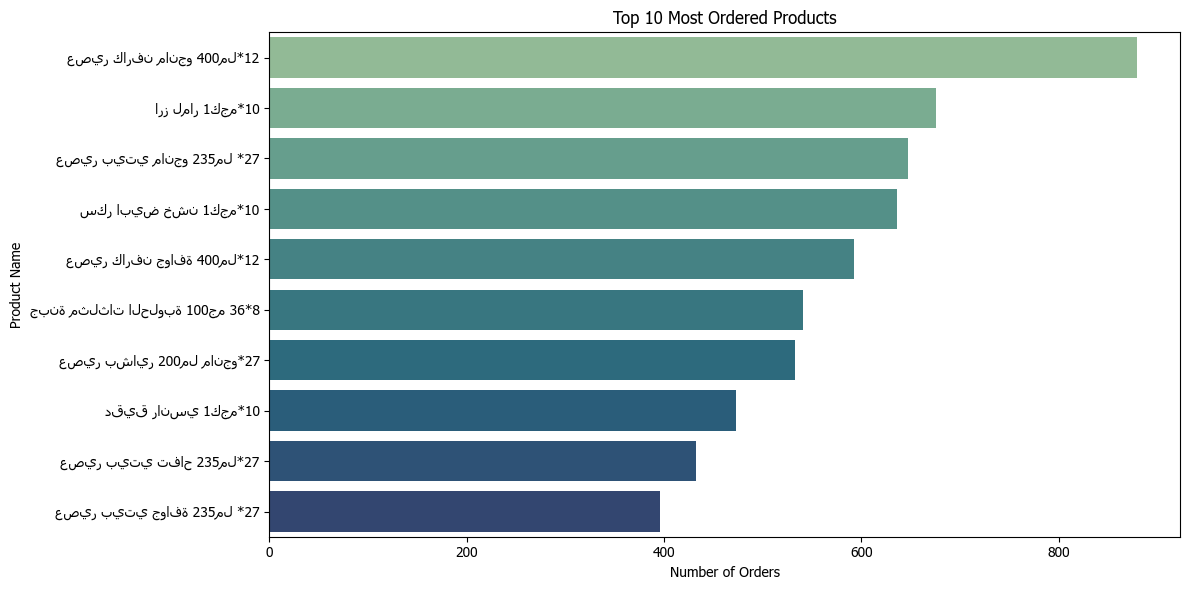

In [32]:
# Graph 1: Top 10 Most Ordered Products
plt.figure(figsize=(12, 6))
top_products = df['ProductName'].value_counts().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

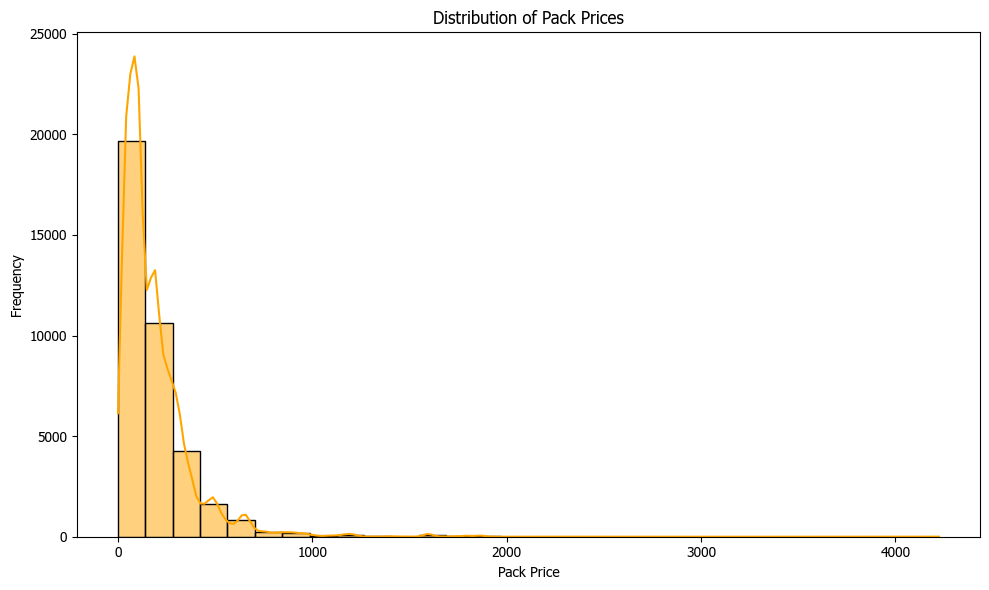

In [33]:
# Graph 2: Distribution of Pack Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PackPrice'], bins=30, kde=True, color='orange')
plt.title('Distribution of Pack Prices')
plt.xlabel('Pack Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [45]:
# Save cleaned data to new Excel file
df.to_excel('cleaned_output.xlsx', sheet_name='Cleaned Data', index=False)